In [55]:
import os
import urllib
import tarfile

DOWNLOAD_ROOT='https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH=os.path.join(os.getcwd(), 'datasets', 'housing')
HOUSING_URL=DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [146]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [147]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [148]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [149]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [150]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9de6ff1e48>,
      dtype=object)

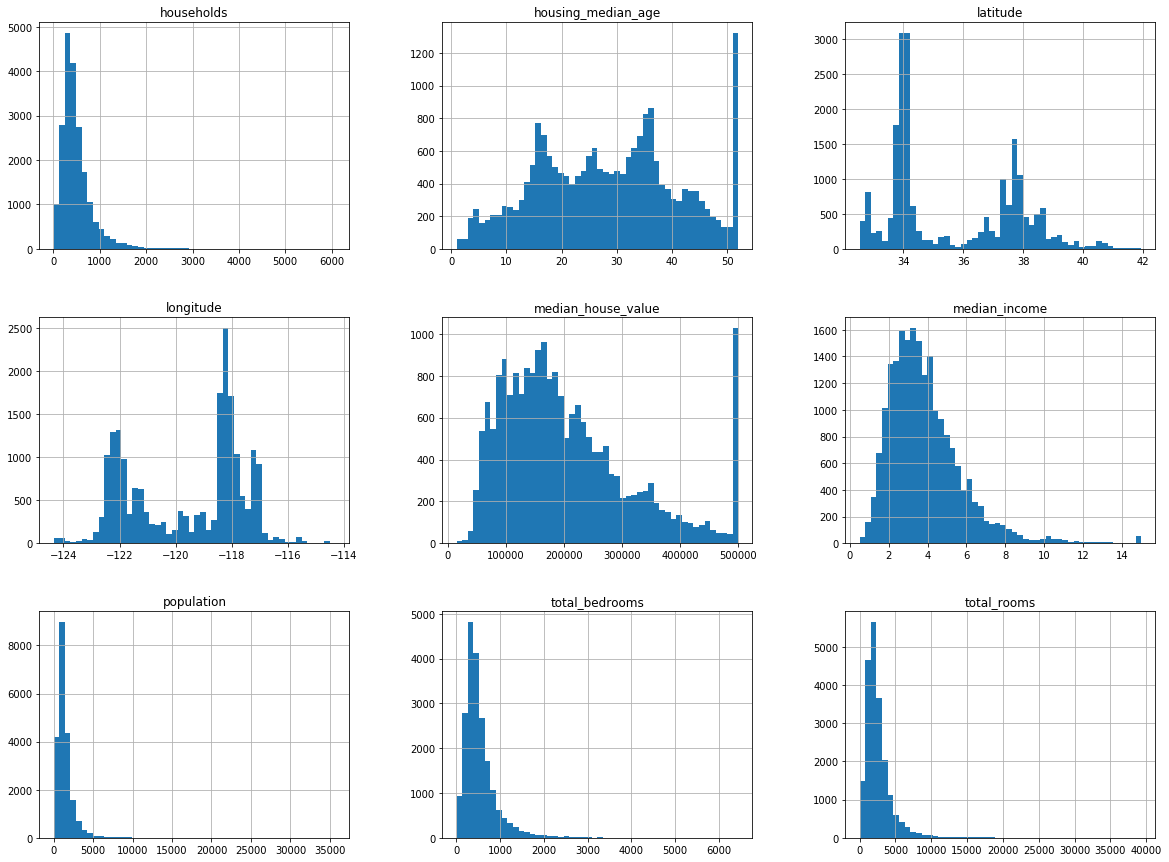

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))

In [152]:
# TRAIN TEST SPLIT
# import numpy as np
#
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
#
# train_set, test_set = split_train_test(housing, 0.2)

# TRAIN TEST SPLIT
# from zlib import crc32
#
# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
#
# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda _id: test_set_check(_id, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]
#
# housing_with_id = housing.reset_index()
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=1)

In [192]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15961    -122.43     37.71                52.0       1410.0           286.0   
1771     -122.35     37.95                42.0       1485.0           290.0   
16414    -121.24     37.90                16.0         50.0            10.0   
5056     -118.35     34.02                34.0       5218.0          1576.0   
8589     -118.39     33.89                38.0       1851.0           332.0   
...          ...       ...                 ...          ...             ...   
10955    -117.88     33.76                17.0       1768.0           474.0   
17289    -119.63     34.42                42.0       1765.0           263.0   
5192     -118.26     33.93                42.0       1433.0           295.0   
12172    -117.16     33.73                10.0       2381.0           454.0   
235      -122.20     37.79                35.0       1802.0           459.0   

       population  households  median_income  median_house_value  \
15961       879.0       282.0         3.1908            255600.0   
1771        971.0       303.0         3.6094            114600.0   
16414        20.0         6.0         2.6250            137500.0   
5056       3538.0      1371.0         1.5143            118800.0   
8589        750.0       314.0         7.3356            422700.0   
...           ...         ...            ...                 ...   
10955      1079.0       436.0         1.7823            205300.0   
17289       753.0       260.0         8.5608            500001.0   
5192        775.0       293.0         1.1326            104800.0   
12172      1323.0       477.0         2.6322            140700.0   
235        1009.0       390.0         2.3036            126000.0   

      ocean_proximity  
15961        NEAR BAY  
1771         NEAR BAY  
16414          INLAND  
5056        <1H OCEAN  
8589        <1H OCEAN  
...               ...  
10955       <1H OCEAN  
17289       <1H OCEAN  
5192        <1H OCEAN  
12172          INLAND  
235          NEAR BAY  

[16512 rows x 10 columns]

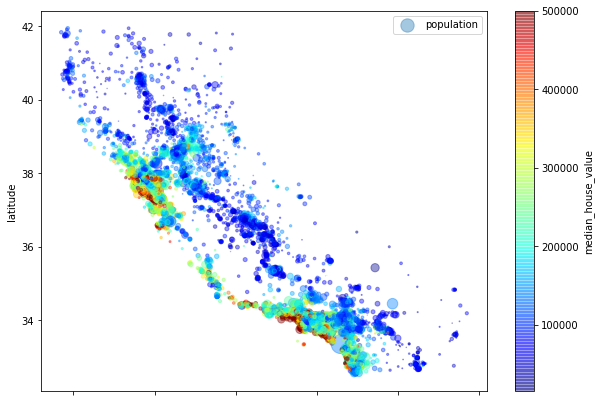

In [193]:
train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=train_set['population']/100,
              label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

/home/codejamninja/.pyenv/versions/3.6.9/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


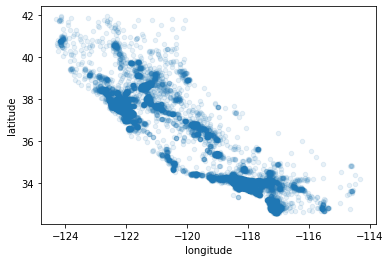

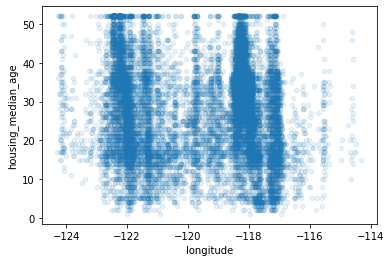

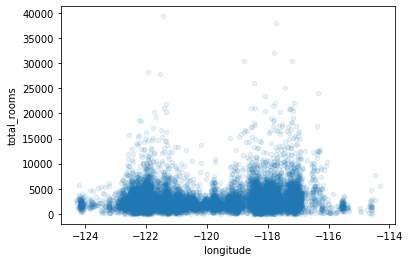

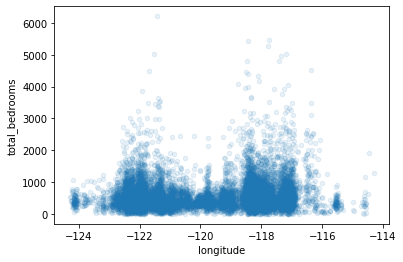

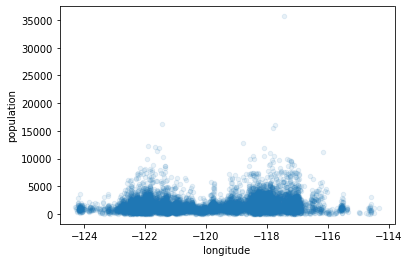

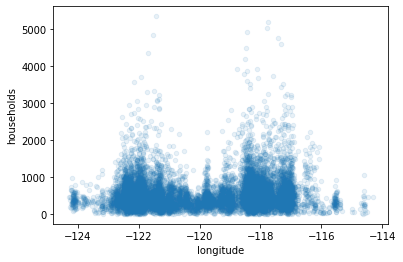

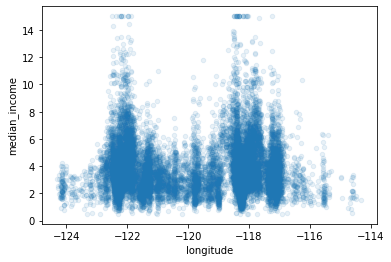

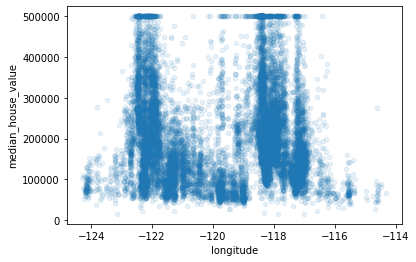

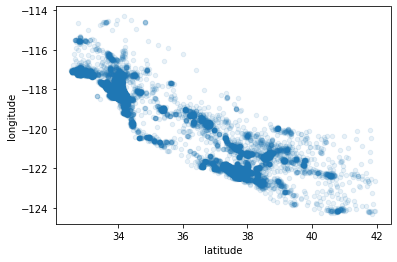

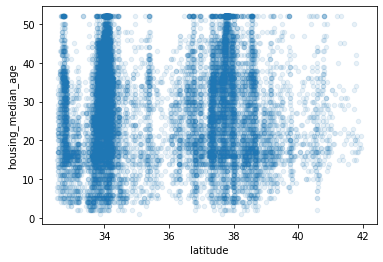

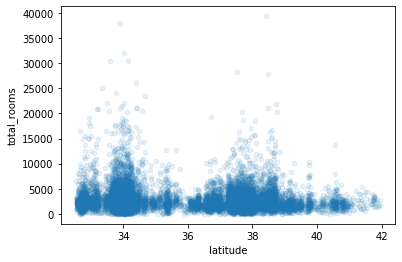

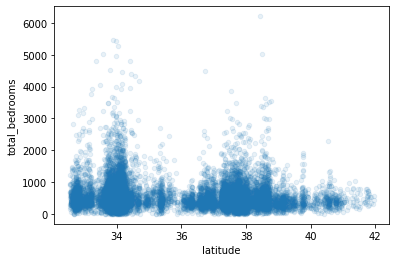

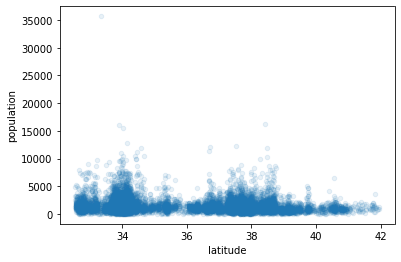

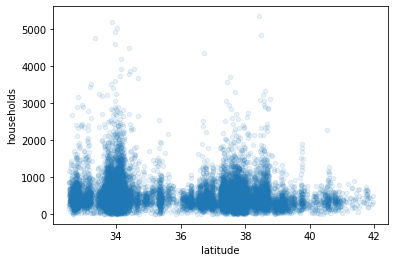

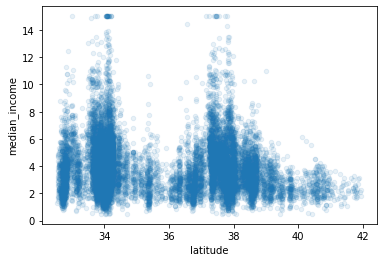

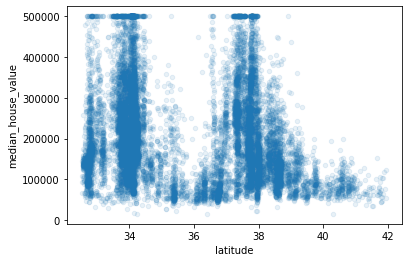

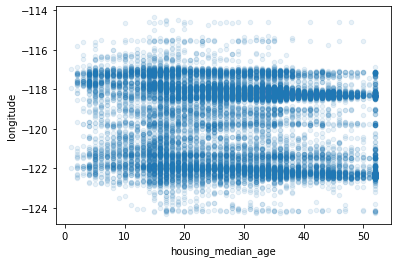

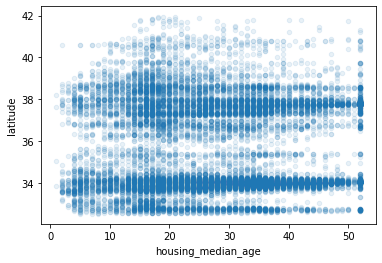

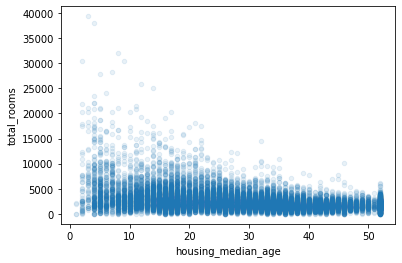

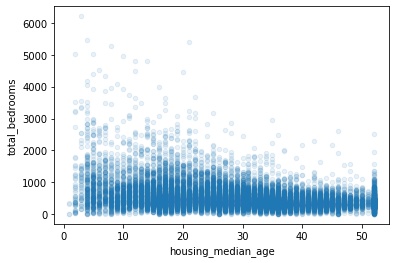

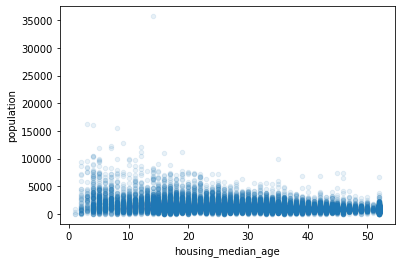

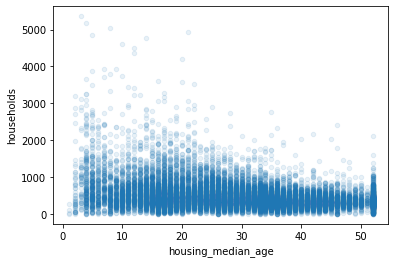

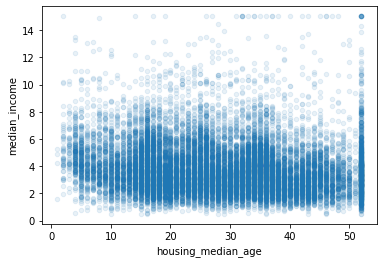

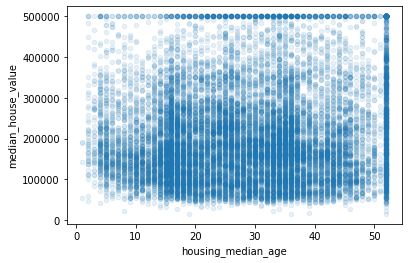

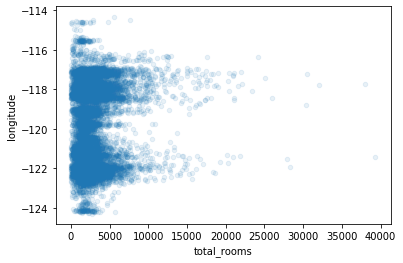

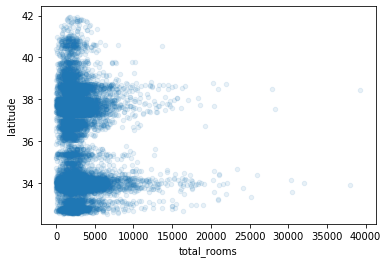

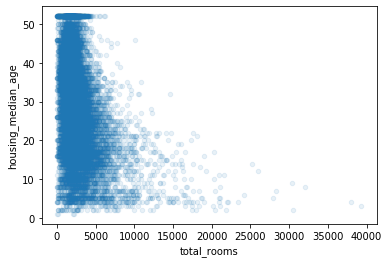

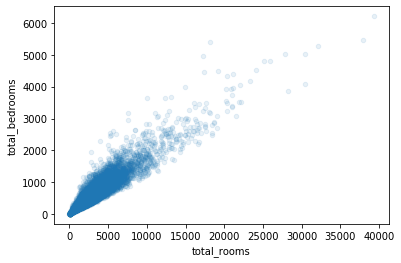

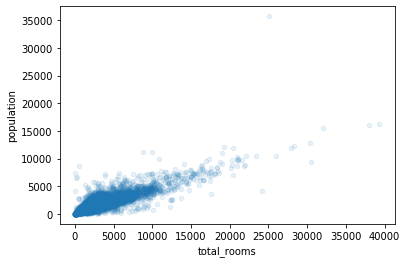

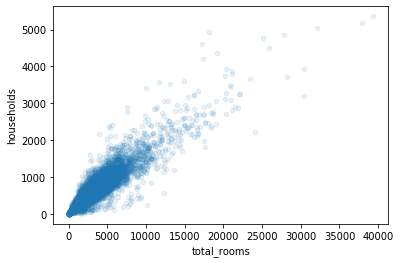

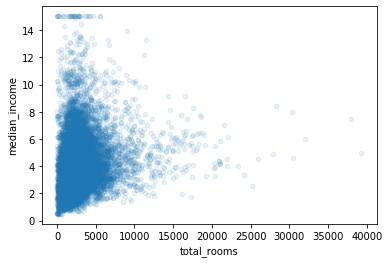

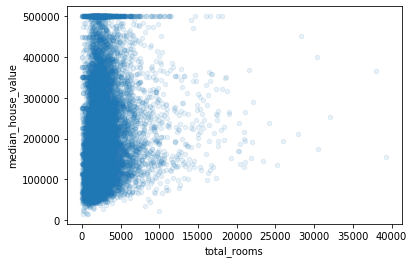

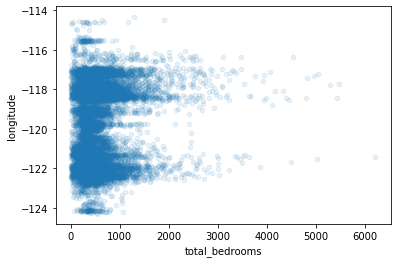

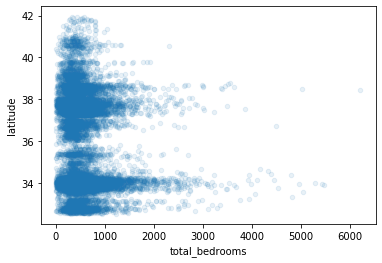

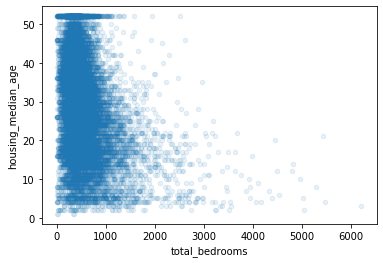

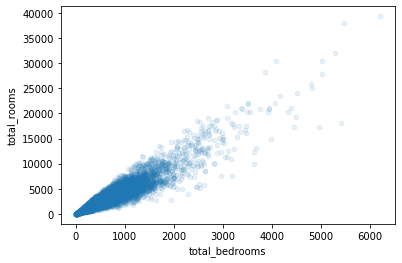

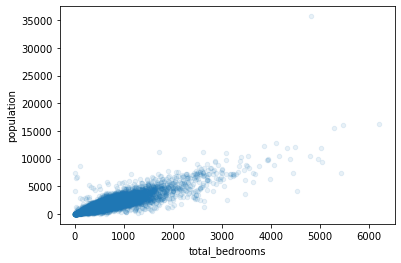

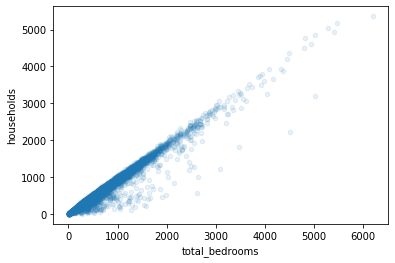

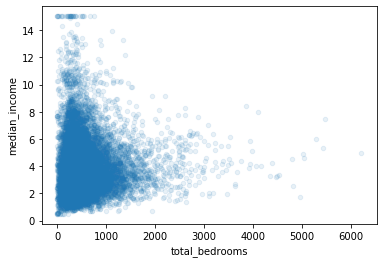

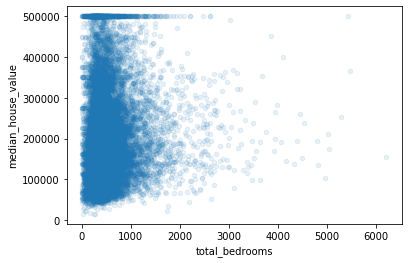

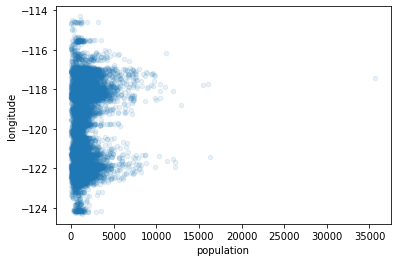

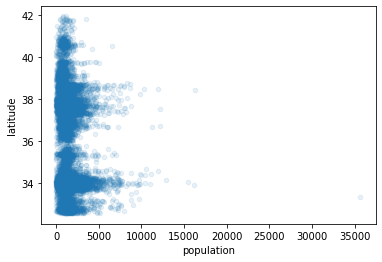

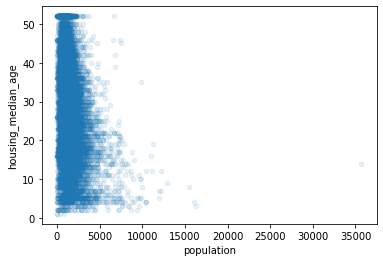

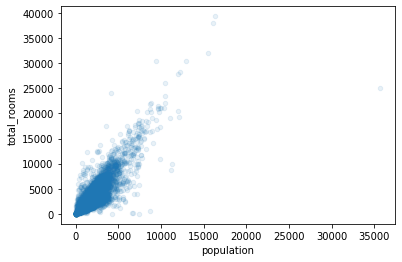

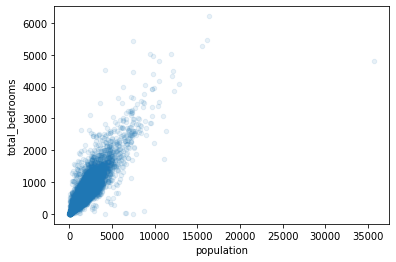

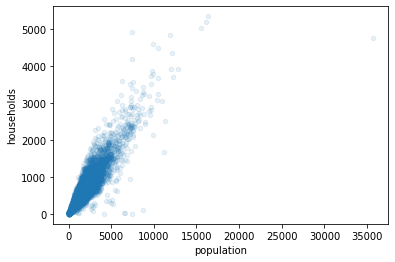

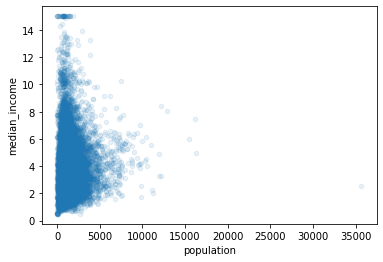

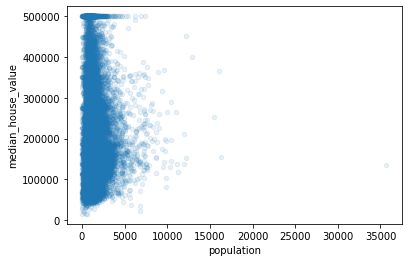

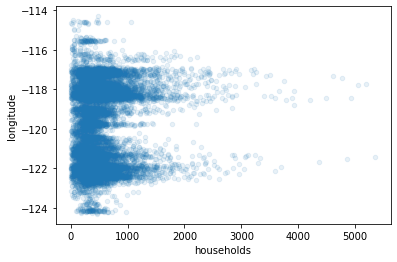

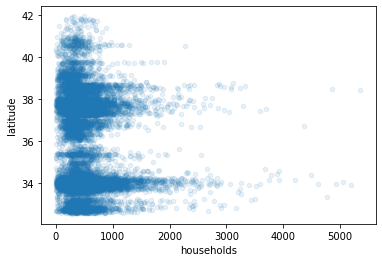

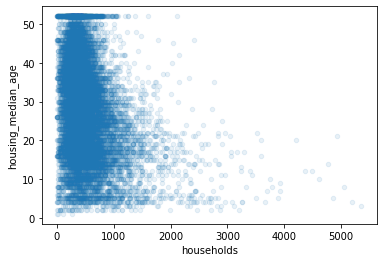

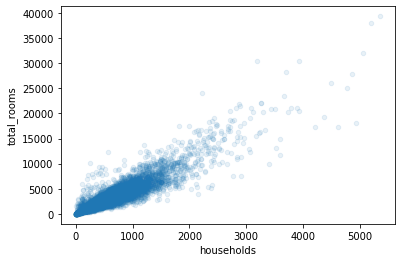

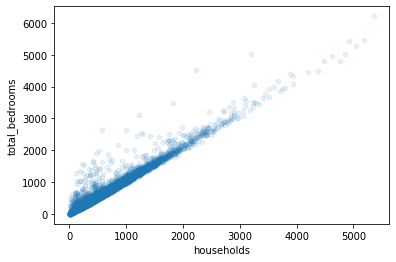

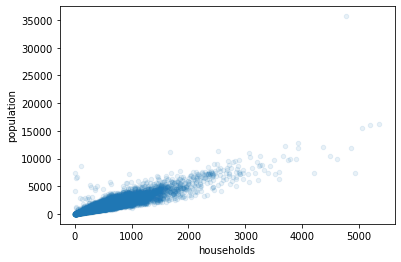

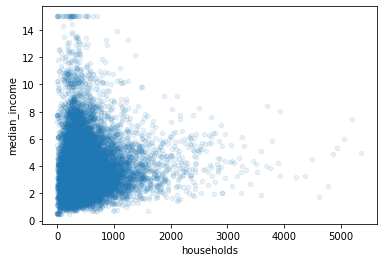

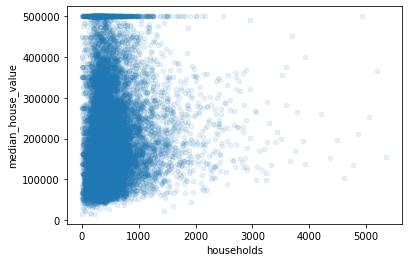

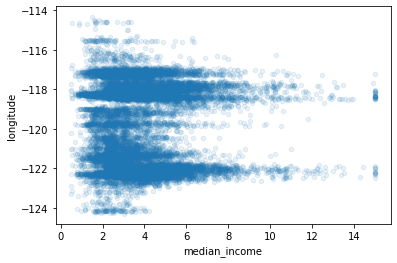

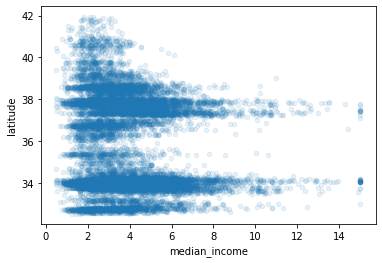

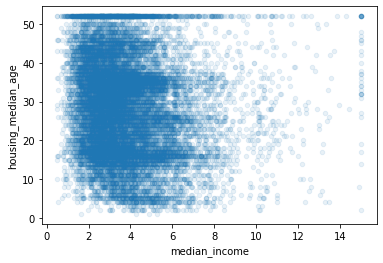

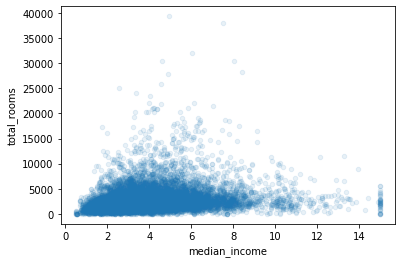

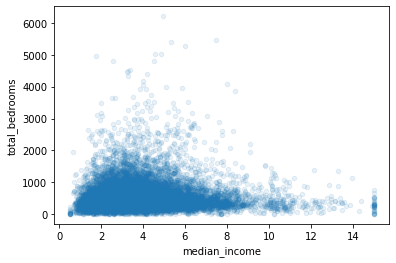

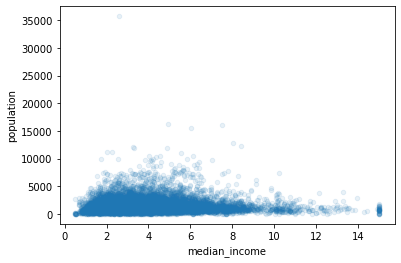

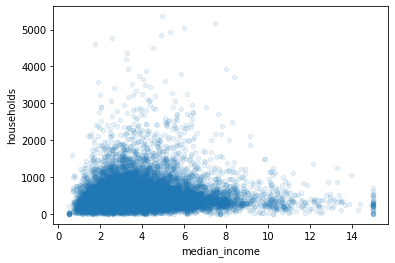

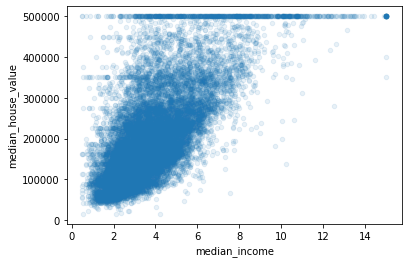

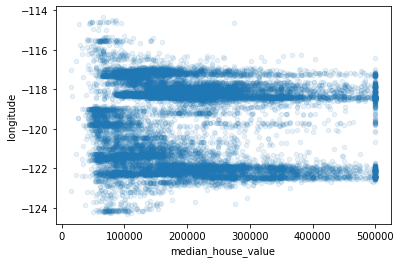

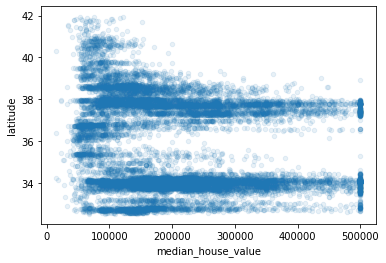

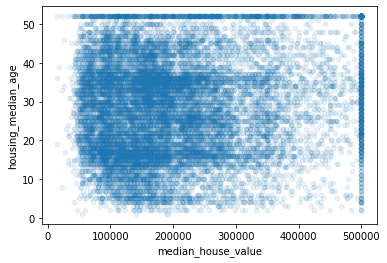

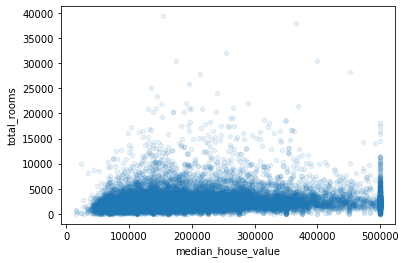

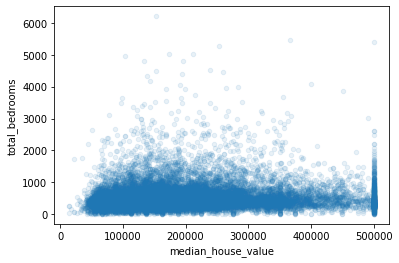

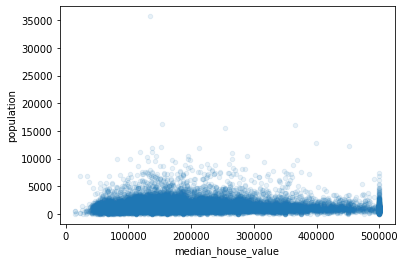

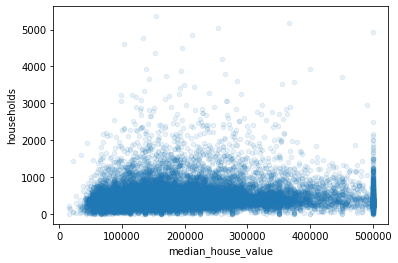

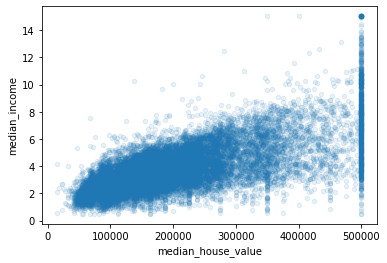

In [199]:
def plot_against(X_p, x_column):
    for column in X_p.columns:
        if column != x_column and (isinstance(X_p[column].values[0], float)
          or isinstance(X_p[column].values[0], int)):
            train_set.plot(kind='scatter', x=x_column, y=column, alpha=0.1)

def plot_against_all(X_p):
    for column in X_p.columns:
        if isinstance(X_p[column].values[0], float) or isinstance(X_p[column].values[0], int):
            plot_against(X_p, column)
            
plot_against_all(test_set)

In [200]:
train_set.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925246           -0.106156     0.037578   
latitude            -0.925246  1.000000            0.009373    -0.029916   
housing_median_age  -0.106156  0.009373            1.000000    -0.361784   
total_rooms          0.037578 -0.029916           -0.361784     1.000000   
total_bedrooms       0.065412 -0.063107           -0.319623     0.929219   
population           0.095861 -0.105325           -0.296996     0.854458   
households           0.049854 -0.066939           -0.301496     0.916737   
median_income       -0.018227 -0.076734           -0.123550     0.201318   
median_house_value  -0.050893 -0.139374            0.105758     0.135514   

                    total_bedrooms  population  households  median_income  \
longitude                 0.065412    0.095861    0.049854      -0.018227   
latitude                 -0.063107   -0.105325   -0.066939      -0.076734   
housing_median_age       -0.319623   -0.296996   -0.301496      -0.123550   
total_rooms               0.929219    0.854458    0.916737       0.201318   
total_bedrooms            1.000000    0.875187    0.979268      -0.006820   
population                0.875187    1.000000    0.905040       0.007521   
households                0.979268    0.905040    1.000000       0.013801   
median_income            -0.006820    0.007521    0.013801       1.000000   
median_house_value        0.050560   -0.023884    0.066801       0.688194   

                    median_house_value  
longitude                    -0.050893  
latitude                     -0.139374  
housing_median_age            0.105758  
total_rooms                   0.135514  
total_bedrooms                0.050560  
population                   -0.023884  
households                    0.066801  
median_income                 0.688194  
median_house_value            1.000000

In [201]:
housing['ocean_proximity'].head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [204]:
# ORDINAL ENCODING
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# ordinal_encoder.fit_transform(housing[['ocean_proximity']])

# ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
x = one_hot_encoder.fit_transform(housing[['ocean_proximity']])
print(one_hot_encoder.categories_)
x.toarray()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [205]:
# DROP CORRESPONDING DISTRICTS
# housing.dropna(subset['total_bedrooms'])
# housing.dropna(subset['bedrooms_per_room'])

# DROP ATTRIBUTE
# housing.drop('total_bedrooms', axis=1)
# housing.drop('bedrooms_per_room', axis=1)

# MEDIAN
# housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)
# housing['bedrooms_per_room'].fillna(housing['bedrooms_per_room'].median(), inplace=True)

from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='median')
X = housing.drop('ocean_proximity', axis=1)
simple_imputer.fit_transform(X)

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [208]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    total_rooms_ix, total_bedrooms_ix, population_ix, households_ix = 3,4,5,6

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if hasattr(X, 'values'):
            X = X.values
        rooms_per_household = X[:,self.total_rooms_ix]/X[:,self.households_ix]
        bedrooms_per_room = X[:,self.total_bedrooms_ix]/X[:,self.total_rooms_ix]
        population_per_household = X[:,self.population_ix]/X[:,self.households_ix]
        return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household]

    def transform_df(self, X_p, y=None):
        X = self.transform(X_p.values, y)
        X_p['rooms_per_household'] = X[:,len(X[0])-1]
        X_p['bedrooms_per_room'] = X[:,len(X[0])-2]
        X_p['population_per_household'] = X[:,len(X[0])-3]
        return X_p

combined_attributes_adder = CombinedAttributesAdder()
combined_attributes_adder.transform(housing)

array([[-122.23, 37.88, 41.0, ..., 6.984126984126984,
        0.14659090909090908, 2.5555555555555554],
       [-122.22, 37.86, 21.0, ..., 6.238137082601054,
        0.15579659106916466, 2.109841827768014],
       [-122.24, 37.85, 52.0, ..., 8.288135593220339,
        0.12951601908657123, 2.8022598870056497],
       ...,
       [-121.22, 39.43, 17.0, ..., 5.20554272517321, 0.21517302573203195,
        2.325635103926097],
       [-121.32, 39.43, 18.0, ..., 5.329512893982808,
        0.21989247311827956, 2.1232091690544412],
       [-121.24, 39.37, 16.0, ..., 5.254716981132075,
        0.22118491921005387, 2.616981132075472]], dtype=object)

In [215]:
# from sklearn.preprocessing import MinMaxScaler
#
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit_transform(housing.values)

# from sklearn.preprocessing import StandardScaler
#
# standard_scaler = StandardScaler()
# standard_scaler.fit_transform(housing)